In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import data
train = pd.read_csv('../../data/raw/Emergent_NAACL2016/emergent/url-versions-2015-06-14-clean-train.csv')
train.drop(columns=["Unnamed: 0"], inplace=True)

In [3]:
#create features
align_feature = pd.read_csv('../../data/processed/features/alignment_feature.csv')
cosine_feature = pd.read_csv('../../data/processed/features/cosine_feature.csv')
bow_feature = pd.read_csv('../../data/processed/features/headline_BoW.csv')
qmark_feature = pd.read_csv('../../data/processed/features/headline_Qmark.csv')
neg_alignment_feature = pd.read_csv('../../data/processed/features/neg_alignment_feature.csv')
root_dist_feature = pd.read_csv('../../data/processed/features/root_dist_min.csv')
svo_feature = pd.read_csv('../../data/processed/features/svo_Lexical.csv')

In [4]:
#target_map = {"for": 0, "observing": 1, "against": 2}

In [5]:
#train = train.replace({"articleHeadlineStance": target_map})

In [6]:
train["articleHeadlineStance"].value_counts()#,test["articleHeadlineStance"].value_counts()

for          992
observing    775
against      304
Name: articleHeadlineStance, dtype: int64

In [7]:
train = pd.merge(train, align_feature, on="articleId")
train = pd.merge(train, cosine_feature, on="articleId")
train = pd.merge(train, bow_feature, on="articleId")
train = pd.merge(train, qmark_feature, on="articleId")
train = pd.merge(train, neg_alignment_feature, on="articleId")
train = pd.merge(train, root_dist_feature, on="articleId")
train = pd.merge(train, svo_feature, on="articleId")

In [8]:
#train["articleHeadlineStance"] = train["articleHeadlineStance"].astype("int")

In [9]:
# merge datasets and shuuffle with random seed
seed = 1234

train = sklearn.utils.shuffle(train, random_state=seed)
#test = sklearn.utils.shuffle(test, random_state=seed)


In [10]:
# create train and test

X_train = train.to_numpy()[:,5:]
Y_train = train["articleHeadlineStance"].values.reshape((-1,))

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_train, Y_train, test_size=0.20, random_state=42)


#X_test = test.to_numpy()[:,5:]
#Y_test = test["articleHeadlineStance"].values.reshape((-1,))

In [11]:
Y_train = Y_Train
X_train = X_Train.astype(float)
X_val = X_Test.astype(float)
Y_val = Y_Test

In [12]:
from sklearn import preprocessing

In [13]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [14]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

[LibSVM]

/home/sharwinbobde/envs/Inforet/lib/python3.8/site-packages/sklearn/svm/_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'




 ------------ kernel = linear ------------
Number of mislabeled points out of a total 415 points : 143
Accuracy on test set: 0.655421686746988
[[0.45454545 0.27272727 0.27272727]
 [0.         0.74129353 0.25870647]
 [0.01886792 0.36477987 0.6163522 ]]
[LibSVM]

KeyboardInterrupt: 

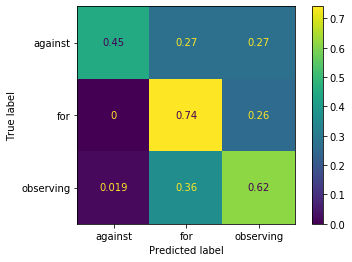

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

kernels = ("linear", "rbf", "poly")
seed = 1234
max_iter=10e2
tol = 1e-2
verbose = True

disp = []

for kernel in kernels:
    soln = SVC(kernel=kernel, decision_function_shape="ovr",
               random_state=seed, max_iter=max_iter, verbose=verbose,
               tol=tol)
    soln.fit(X_train, Y_train)
    
    ypred = soln.predict(X_val)
    
    print("\n\n ------------ kernel = "+kernel+" ------------")
    print("Number of mislabeled points out of a total %d points : %d" % (X_val.shape[0], (Y_val != ypred).sum()))
    print("Accuracy on test set: "+str(soln.score(X_val,Y_val)))
    print(confusion_matrix(Y_val, ypred, normalize="true"))
    plot_confusion_matrix(soln, X_val, Y_val, normalize="true")
    
    
    f1_score(Y_val, ypred, average=None)

